#Data Dictionnary

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import libraries


In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np
import math

from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_absolute_error


#visualisation thingy
import matplotlib.pyplot as plt  
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

#data modeling
import seaborn as seabornInstance 
import statsmodels.api as sm



%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Exploration

In [3]:
data=pd.read_csv('/content/drive/My Drive/AE_PJ/climate_change.csv',low_memory=False)
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [4]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [6]:
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


##Problem 1: Creating a LR 







In [8]:
X = data[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
y=data['Temp']

In [30]:
#Subset the data
train = data[data.Year <= 2006]
test = data[data.Year > 2006]
X_train = train[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']].values
y_train = train['Temp'].values
X_test = test[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']].values
y_test = test['Temp'].values


In [9]:
#Let's divide the datased into training and testing sets
import random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((246, 8), (62, 8), (246,), (62,))

In [32]:
#Let's build our Linear Regressor
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor.coef_)

y_pred = regressor.predict(X_test)

[ 6.42053134e-02  6.45735927e-03  1.24041896e-04 -1.65280033e-02
 -6.63048889e-03  3.80810324e-03  9.31410835e-02 -1.53761324e+00]


In [33]:
#compare predicted data with real data of the testing set
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head()
df1

,Actual,Predicted
0,0.601,0.468602
1,0.498,0.444782
2,0.435,0.427806
3,0.466,0.431168
4,0.372,0.446074


In [34]:
##Get summary of the linear regression model
from statsmodels.api import OLS
# OLS(y_train,sm.add_constant(X_train)).fit().summary()

mod=sm.OLS(y,X)
res=mod.fit()

print(res.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                   Temp   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              353.2
Date:                Fri, 30 Oct 2020   Prob (F-statistic):                   9.12e-148
Time:                        11:46:01   Log-Likelihood:                          281.75
No. Observations:                 308   AIC:                                     -547.5
Df Residuals:                     300   BIC:                                     -517.7
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [36]:
mean_resid = np.sqrt((1/200)*res.ssr)
mean_resp =data["Temp"].mean()
print("Model mse : ",mean_resid)
print("Temp mean:" , mean_resp )
print("ratio(%) : " ,float(100*mean_resid/ mean_resp) )
print("------------------------------")
print("R squared : "  , res.rsquared )
print("The predictors explain almost 90% of the variance in Temperature")
print("------------------------------")
print("Which variables are significant in the model? We will consider a variable signficant only if the p-value is below 0.05")
print("Answer: CO2 and CH4")

Model mse :  0.12029172967187779
Temp mean: 0.256775974025974
ratio(%) :  46.846956818362514
------------------------------
R squared :  0.9040256438290815
The predictors explain almost 90% of the variance in Temperature
------------------------------
Which variables are significant in the model? We will consider a variable signficant only if the p-value is below 0.05
Answer: CO2 and CH4


##Problem 2: Understanding the model

Q:

Current scientific opinion is that nitrous oxide and CFC-11 are greenhouse gases: gases that are able to trap heat from the sun and contribute to the heating of the Earth. However, the regression coefficients of both the N2O and CFC-11 variables are negative, indicating that increasing atmospheric concentrations of either of these two compounds is associated with lower global temperatures.

Which of the following is the simplest correct explanation for this contradiction?

A: 
All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set.

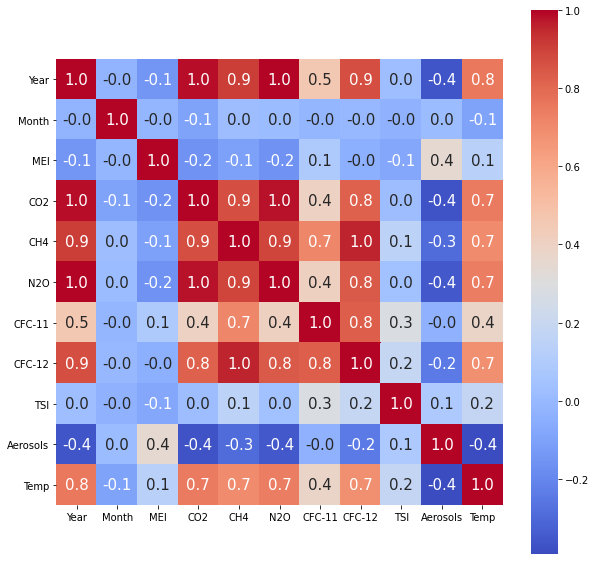

In [39]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap="coolwarm")

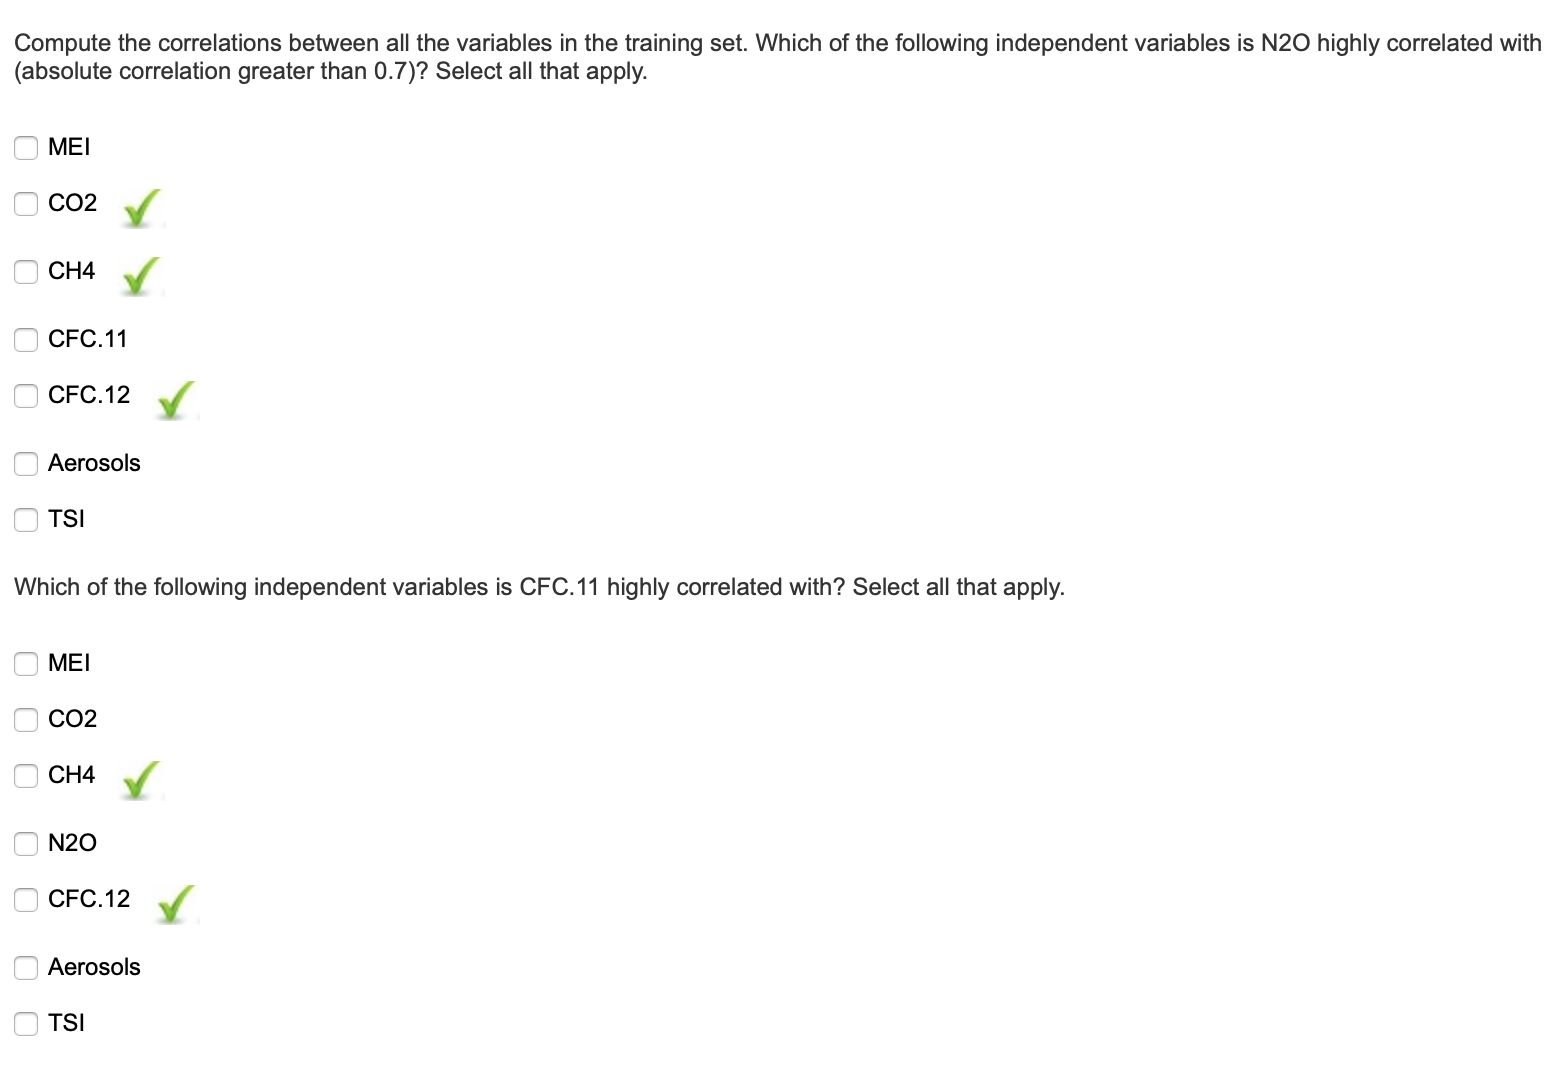

##Problem 3: Simplifying the model

In [41]:
X1 = data[['MEI', 'N2O', 'TSI', 'Aerosols']]
y1=data['Temp']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=30)


In [43]:
#Subset the data
train = data[data.Year <= 2006]
test = data[data.Year > 2006]
X1_train = train[['MEI', 'N2O', 'TSI', 'Aerosols']].values
y1_train = train['Temp'].values
X1_test = test[['MEI', 'N2O', 'TSI', 'Aerosols']].values
y1_test = test['Temp'].values



In [44]:
from statsmodels.api import OLS
OLS(y1_train,sm.add_constant(X1_train)).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     184.9
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           3.52e-77
Time:                        11:55:19   Log-Likelihood:                 266.64
No. Observations:                 284   AIC:                            -523.3
Df Residuals:                     279   BIC:                            -505.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -116.2269     20.223     -5.747      0.000    -156.036     -76.418
x1             0.0642      0.007      9.649      0.000       0.051       0.077
x2             0.0253      0.001     19.307      0.000       0.023       0.028
x3             0.0795      0.015      5.344      0.000       0.050       0.109
x4            -1.7017      0.218     -7.806      0.000      -2.131      -1.273
==============================================================================
Omnibus:                       10.908   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.097
Skew:                           0.289   Prob(JB):                     0.000527
Kurtosis:                       3.971   Cond. No.                     5.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""